In [102]:
# Constants
TRAIN_FRACTION = 0.7
RANDOM_SEED = 86720

In [103]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [104]:
df = pd.read_csv(r"..\..\data\diabetes\diabetes.csv")

In [105]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [107]:
train_data = df.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)

In [108]:
train_index = list(train_data.index)

In [109]:
test_data = df.drop(train_index)

In [110]:
test_index = list(test_data.index)

In [111]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [112]:
x_test = test_data[features]

In [113]:
y_test = test_data['Outcome']

In [114]:
x_train = train_data[features]
y_train = train_data['Outcome']

In [115]:
print(f"Number of diabetic patients in training - {sum(y_train)}")
print(f"Number of non-diabetic patients in training - {sum(1-(y_train))}")

Number of diabetic patients in training - 202
Number of non-diabetic patients in training - 336


In [116]:
print(f"Number of diabetic patients in test - {sum(y_test)}")
print(f"Number of non-diabetic patients in test - {sum(1-(y_test))}")

Number of diabetic patients in test - 66
Number of non-diabetic patients in test - 164


In [117]:
x_test.shape

(230, 8)

In [118]:
max_depth_tree = 5

#### Entropy Metric - Best Split

In [119]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=max_depth_tree)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.41875, 0.9166666666666666, 'Glucose <= 123.5\nentropy = 0.955\nsamples = 538\nvalue = [336, 202]'),
 Text(0.15625, 0.75, 'BMI <= 26.45\nentropy = 0.721\nsamples = 301\nvalue = [241, 60]'),
 Text(0.05, 0.5833333333333334, 'Pregnancies <= 9.0\nentropy = 0.096\nsamples = 81\nvalue = [80, 1]'),
 Text(0.025, 0.4166666666666667, 'entropy = 0.0\nsamples = 78\nvalue = [78, 0]'),
 Text(0.075, 0.4166666666666667, 'Age <= 30.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.05, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2625, 0.5833333333333334, 'Age <= 28.5\nentropy = 0.839\nsamples = 220\nvalue = [161, 59]'),
 Text(0.175, 0.4166666666666667, 'BMI <= 30.9\nentropy = 0.588\nsamples = 113\nvalue = [97, 16]'),
 Text(0.15, 0.25, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.2, 0.25, 'BloodPressure <= 37.0\nentropy = 0.748\nsamples = 75\nvalue = [59, 16]'),
 Text(0.175, 0.08333333333333333, '

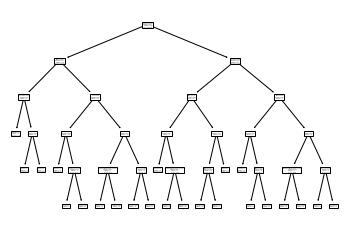

In [120]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 80.11152416356877
Recall Score: 75.24752475247524
Precision score: 72.72727272727273


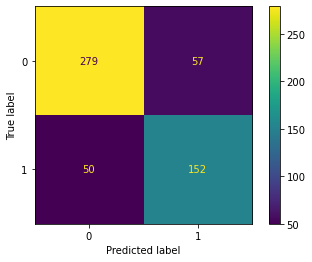

In [121]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 76.08695652173914
Recall Score: 69.6969696969697
Precision score: 56.79012345679012


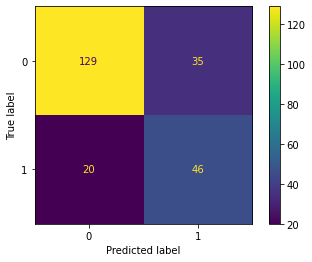

In [122]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

#### Gini Metric - Best Split

In [123]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=max_depth_tree)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.3980263157894737, 0.9166666666666666, 'Glucose <= 123.5\ngini = 0.469\nsamples = 538\nvalue = [336, 202]'),
 Text(0.1513157894736842, 0.75, 'Age <= 28.5\ngini = 0.319\nsamples = 301\nvalue = [241, 60]'),
 Text(0.05263157894736842, 0.5833333333333334, 'BMI <= 30.9\ngini = 0.172\nsamples = 168\nvalue = [152, 16]'),
 Text(0.02631578947368421, 0.4166666666666667, 'gini = 0.0\nsamples = 93\nvalue = [93, 0]'),
 Text(0.07894736842105263, 0.4166666666666667, 'DiabetesPedigreeFunction <= 0.128\ngini = 0.336\nsamples = 75\nvalue = [59, 16]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.10526315789473684, 0.25, 'BloodPressure <= 37.0\ngini = 0.31\nsamples = 73\nvalue = [59, 14]'),
 Text(0.07894736842105263, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.13157894736842105, 0.08333333333333333, 'gini = 0.281\nsamples = 71\nvalue = [59, 12]'),
 Text(0.25, 0.5833333333333334, 'BMI <= 26.35\ngini = 0.443\nsamples = 133\nvalue =

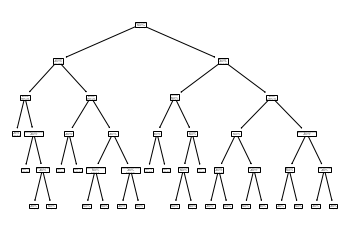

In [124]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 82.15613382899627
Recall Score: 72.77227722772277
Precision score: 78.19148936170212


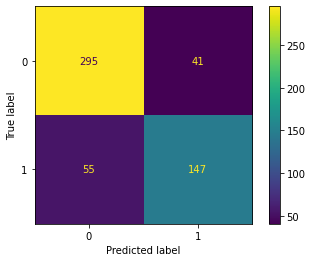

In [125]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 80.0
Recall Score: 74.24242424242425
Precision score: 62.82051282051282


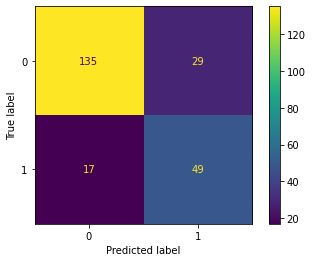

In [126]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

#### Entropy Metric - Random Split

In [127]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=max_depth_tree,splitter="random")
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

[Text(0.4375, 0.9166666666666666, 'Glucose <= 104.329\nentropy = 0.955\nsamples = 538\nvalue = [336, 202]'),
 Text(0.125, 0.75, 'Glucose <= 92.329\nentropy = 0.578\nsamples = 167\nvalue = [144, 23]'),
 Text(0.0625, 0.5833333333333334, 'SkinThickness <= 12.081\nentropy = 0.394\nsamples = 90\nvalue = [83, 7]'),
 Text(0.03125, 0.4166666666666667, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.09375, 0.4166666666666667, 'Age <= 22.224\nentropy = 0.55\nsamples = 55\nvalue = [48, 7]'),
 Text(0.0625, 0.25, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.125, 0.25, 'Age <= 53.125\nentropy = 0.659\nsamples = 41\nvalue = [34, 7]'),
 Text(0.09375, 0.08333333333333333, 'entropy = 0.61\nsamples = 40\nvalue = [34, 6]'),
 Text(0.15625, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1875, 0.5833333333333334, 'BMI <= 24.283\nentropy = 0.737\nsamples = 77\nvalue = [61, 16]'),
 Text(0.15625, 0.4166666666666667, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]'

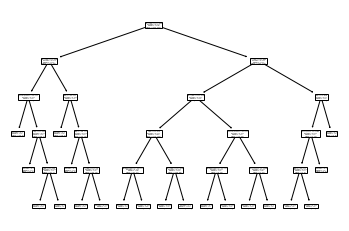

In [128]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 73.42007434944237
Recall Score: 36.633663366336634
Precision score: 83.14606741573034


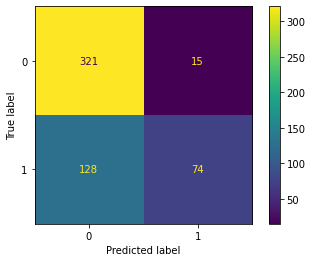

In [129]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 78.69565217391305
Recall Score: 37.878787878787875
Precision score: 75.75757575757575


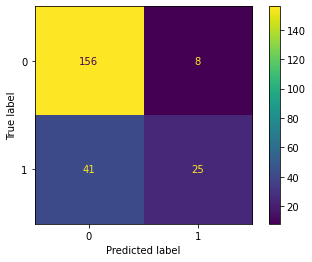

In [130]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

#### Gini Metric - Random Split

In [131]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=max_depth_tree,splitter="random")
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, splitter='random')

[Text(0.5580357142857143, 0.9166666666666666, 'Age <= 36.714\ngini = 0.469\nsamples = 538\nvalue = [336, 202]'),
 Text(0.2857142857142857, 0.75, 'Glucose <= 122.348\ngini = 0.421\nsamples = 359\nvalue = [251, 108]'),
 Text(0.14285714285714285, 0.5833333333333334, 'Age <= 27.19\ngini = 0.274\nsamples = 226\nvalue = [189, 37]'),
 Text(0.07142857142857142, 0.4166666666666667, 'BMI <= 36.605\ngini = 0.166\nsamples = 153\nvalue = [139, 14]'),
 Text(0.03571428571428571, 0.25, 'Age <= 24.261\ngini = 0.13\nsamples = 129\nvalue = [120, 9]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.092\nsamples = 83\nvalue = [79, 4]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.194\nsamples = 46\nvalue = [41, 5]'),
 Text(0.10714285714285714, 0.25, 'BMI <= 51.19\ngini = 0.33\nsamples = 24\nvalue = [19, 5]'),
 Text(0.08928571428571429, 0.08333333333333333, 'gini = 0.287\nsamples = 23\nvalue = [19, 4]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),


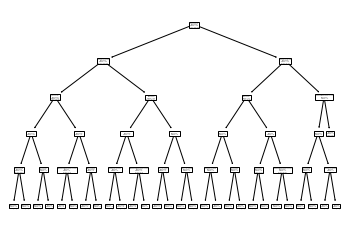

In [132]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 77.5092936802974
Recall Score: 51.98019801980198
Precision score: 81.3953488372093


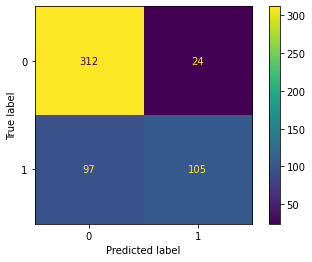

In [133]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 80.0
Recall Score: 51.515151515151516
Precision score: 70.83333333333334


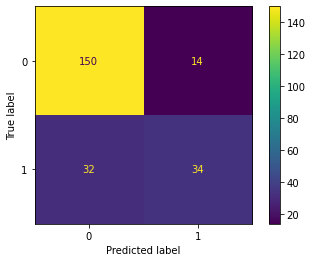

In [134]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")